In [2]:
from pathlib import Path
from unlearning.auditors.utils import (
    load_forget_set_indices,
        get_oracle_paths,

)

ds_name = "CIFAR10"
forget_set_id = 5
forget_set_indices = load_forget_set_indices(ds_name,
                                                forget_set_id)

base_dir =  Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/")


methods = ["oracle_matching", "scrub", "direct"]
#method = methods[0]


import yaml 
from yaml.loader import SafeLoader

def read_yaml(path):
    with open(path) as f:
        return yaml.load(f, Loader=yaml.FullLoader)


import yaml
def read_yaml(path):
    with open(path, "r") as f:
        return yaml.safe_load(f)



class SafeLoaderWithFallback(SafeLoader):
    def construct_mapping(self, node, deep=False):
        mapping = {}
        for key_node, value_node in node.value:
            try:
                key = self.construct_object(key_node, deep=deep)
                value = self.construct_object(value_node, deep=deep)
                mapping[key] = value
            except yaml.YAMLError as e:
                pass 
                #print(f"Skipping key-value pair {key_node.value}: {e}")
        return mapping

def load_yaml_skip_kv_errors(file_path):
    with open(file_path, 'r') as file:
        try:
            return yaml.load(file, Loader=SafeLoaderWithFallback)
        except yaml.YAMLError as e:
            #print(f"Error loading YAML file: {e}")
            return None





import numpy as np 
forget_set_indices
train_points = np.arange(0, 50_000)
val_pts = np.arange(50_000, 60_000)

retain_points = np.setdiff1d(train_points, forget_set_indices)
retain_points.shape
import torch as ch
splits = ["train", "val"]
(
    o_ckpt_0_path,  # we only need a single oracle checkpoint
    o_logit_paths,
    o_margins_paths,
) = get_oracle_paths(ds_name, forget_set_id, splits=splits)

all_oracle_margins = ch.cat(
    [ch.load(path) for path in o_margins_paths], dim=1)



forget_set_path - /n/home04/rrinberg/data_dir__holylabs/unlearning/precomputed_models/forget_set_inds/CIFAR10/forget_set_5.npy


In [118]:


plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 12,                   # Set font size to 11pt
    'axes.labelsize': 12,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})
plt.tight_layout(rect=[0, 0.03, 1, 0.85])


<Figure size 640x480 with 0 Axes>

# TODOS:
1. figure out the best learning rate
2. average over multiple runs

In [3]:

def get_margins_at_timestep(ind, timestep):
    oracles = all_oracle_margins[:, ind].numpy()
    margin = np.load(nps[timestep])[ind]

    return oracles, margin

def get_average_margins_at_timestep(ind, timestep):
    oracles = all_oracle_margins[:, ind].numpy()
    margins = []
    for i, nps in all_nps.items():
        np_ = nps[timestep]
        margin = np.load(np_)[ind]
        margins.append(margin)
    #margin = np.load(nps[timestep])[ind]
    margin = np.mean(margins)
    return oracles, margin

def fit_gaussian(margins):
    mean = np.mean(margins)
    std = np.std(margins)
    return mean, std

def get_gaussian_probability(margin, mean, std):
    return np.exp(-0.5 * ((margin - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

def rolling_average(margins, window = 2):
    return np.convolve(margins, np.ones(window), 'valid') / window

def compute_prob(ind , timestep):
    #oracles, margin = get_margins_at_timestep(ind, timestep)
    oracles, margin = get_average_margins_at_timestep(ind, timestep)
    mean, std = fit_gaussian(oracles)
    prob = get_gaussian_probability(margin, mean, std) * 100
    return prob



In [6]:
dirs
import datetime

datestr = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")


CIFAR10__5__oracle_matching__4692078e2b67c6dc81570f179f214c61
1e-05
CIFAR10__5__oracle_matching__dd4928b485c6451b6ae345c1aa267e80
0.01
CIFAR10__5__oracle_matching__422a5910d2fdb8edb9b033e2d6bd0328
0.005
CIFAR10__5__oracle_matching__36b1132f9e0317a78c85cb0ba424ffc6
0.0001
CIFAR10__5__oracle_matching__6c9f3fb3bf9f7b1df288e717fbc89ab8
0.05
CIFAR10__5__oracle_matching__5dbb7c505b99012cbc48fbaaf29b3476
0.001
CIFAR10__5__oracle_matching__12c7fce579229e61214334262ba96e86
5e-05
CIFAR10__5__oracle_matching__8619f2f65aca013b1b69c250f249517e
0.0005
1e-05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__4692078e2b67c6dc81570f179f214c61/direct
dirname - CIFAR10__5__oracle_matching__4692078e2b67c6dc81570f179f214c61


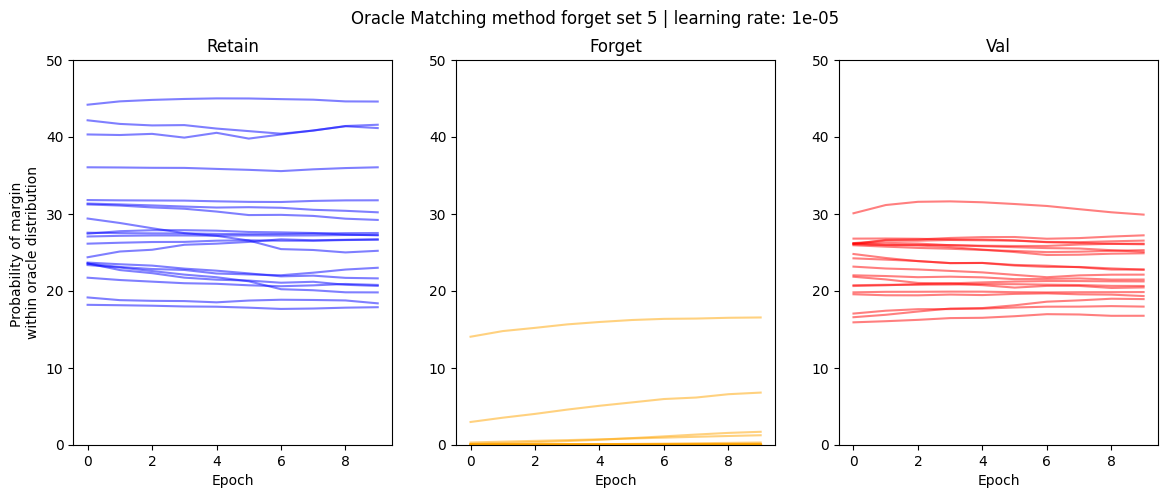

0.01
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__dd4928b485c6451b6ae345c1aa267e80/direct
dirname - CIFAR10__5__oracle_matching__dd4928b485c6451b6ae345c1aa267e80


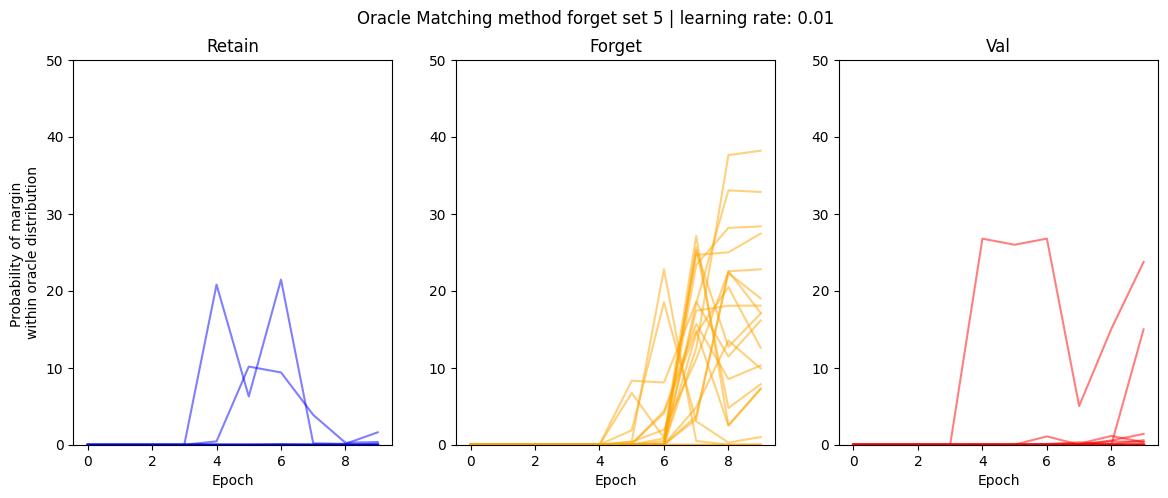

0.005
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__422a5910d2fdb8edb9b033e2d6bd0328/direct
dirname - CIFAR10__5__oracle_matching__422a5910d2fdb8edb9b033e2d6bd0328


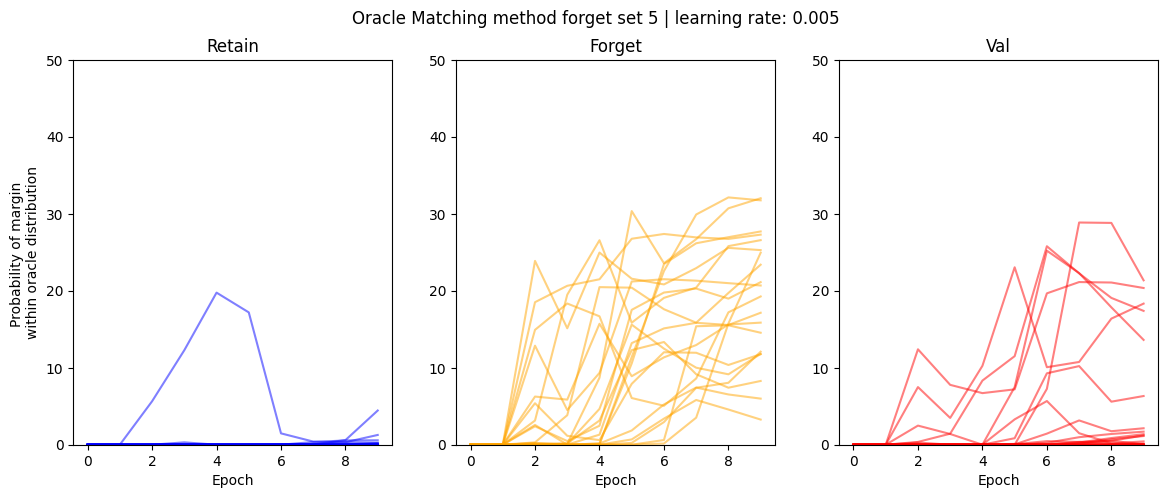

0.0001
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__36b1132f9e0317a78c85cb0ba424ffc6/direct
dirname - CIFAR10__5__oracle_matching__36b1132f9e0317a78c85cb0ba424ffc6


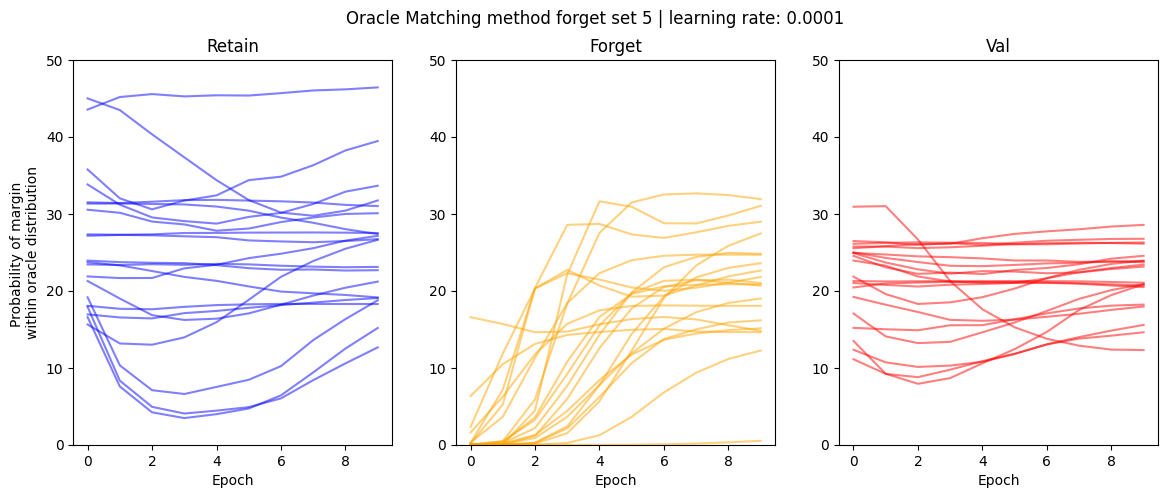

0.05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__6c9f3fb3bf9f7b1df288e717fbc89ab8/direct
dirname - CIFAR10__5__oracle_matching__6c9f3fb3bf9f7b1df288e717fbc89ab8


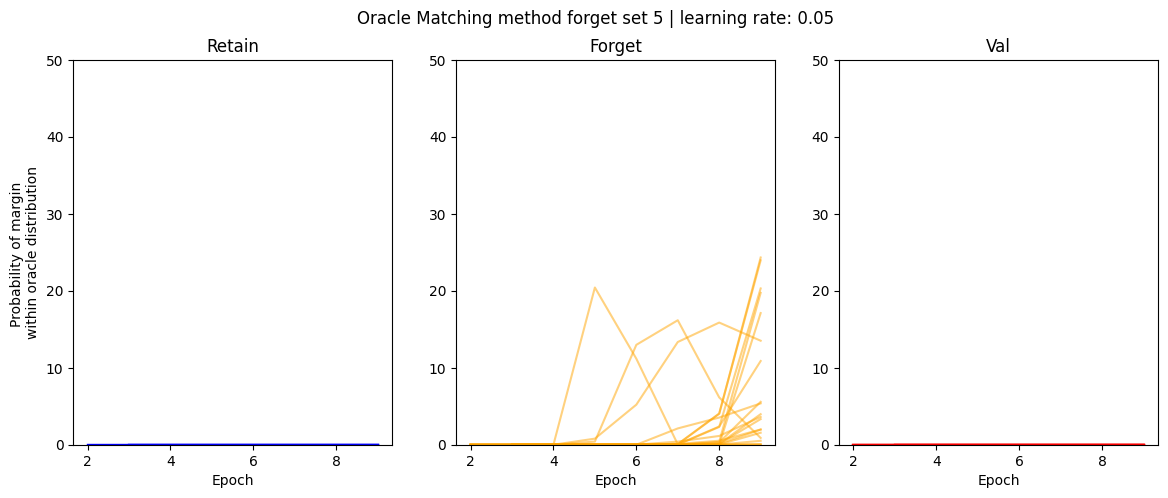

0.001
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__5dbb7c505b99012cbc48fbaaf29b3476/direct
dirname - CIFAR10__5__oracle_matching__5dbb7c505b99012cbc48fbaaf29b3476


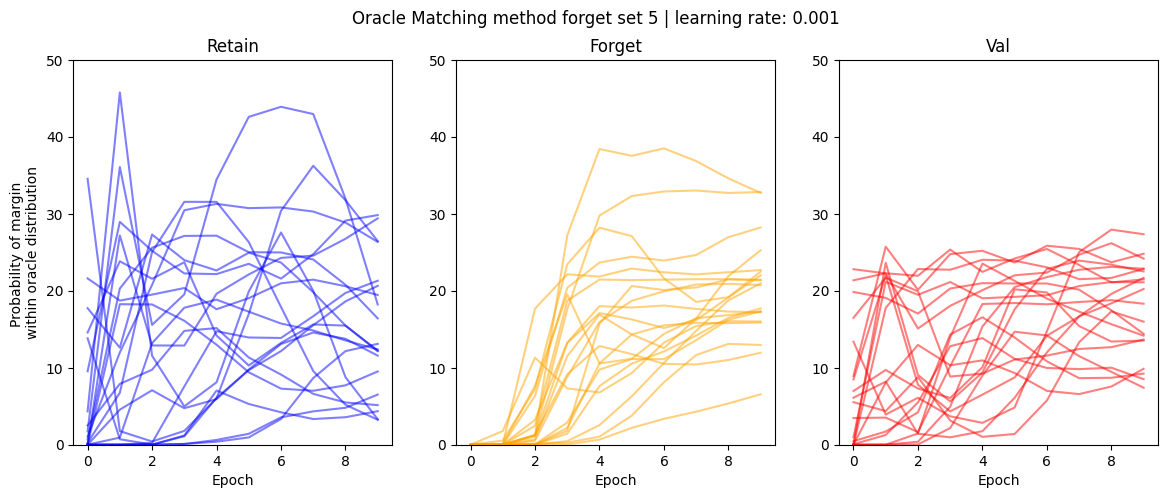

5e-05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__12c7fce579229e61214334262ba96e86/direct
dirname - CIFAR10__5__oracle_matching__12c7fce579229e61214334262ba96e86


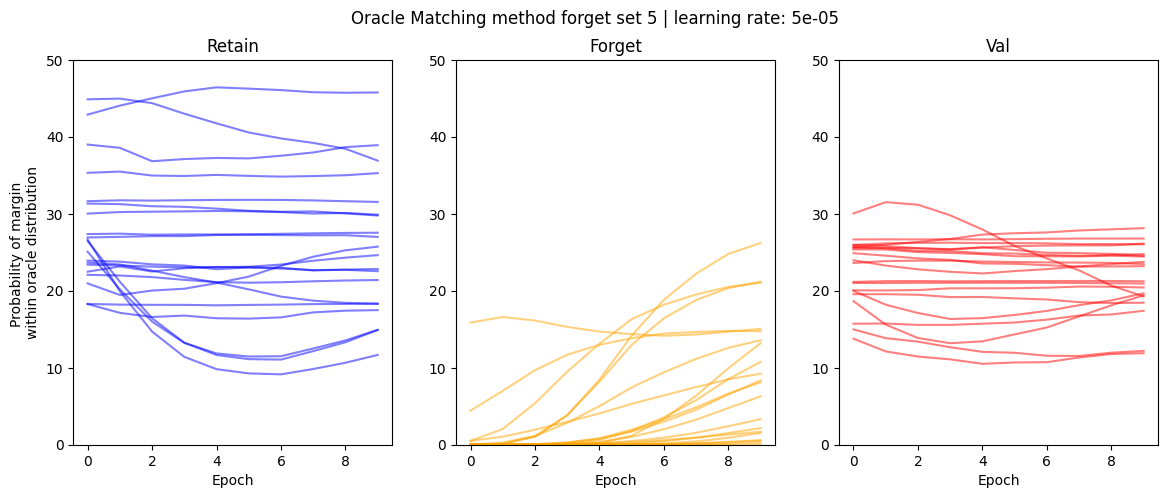

0.0005
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__8619f2f65aca013b1b69c250f249517e/direct
dirname - CIFAR10__5__oracle_matching__8619f2f65aca013b1b69c250f249517e


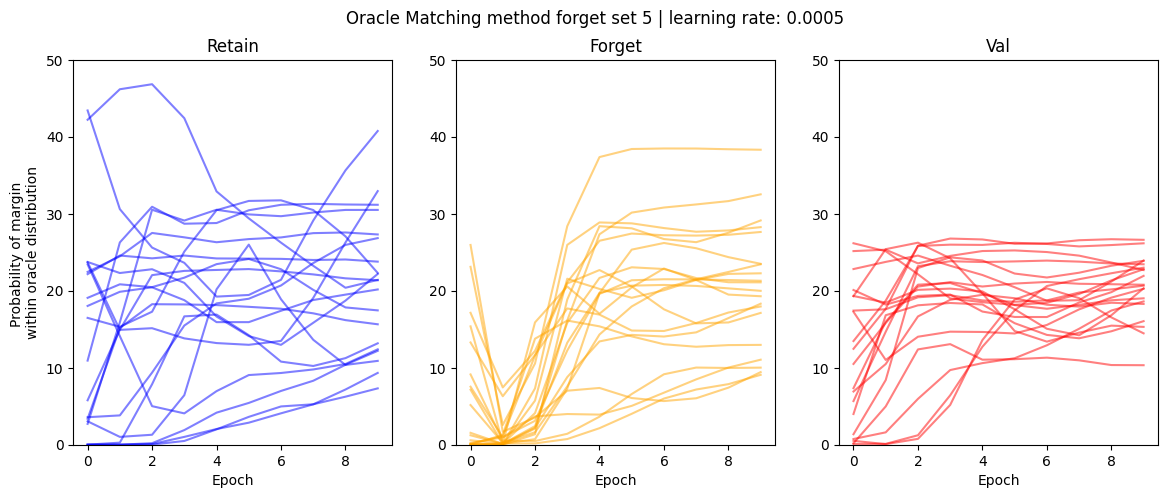

CIFAR10__5__scrub__342d9cc35efda6718a1e140d2f66d892
1e-05
CIFAR10__5__scrub__2c96ecb4075aa8193582d88b8b9979fc
5e-05
CIFAR10__5__scrub__59c9b0a3c5ae88bace25058eba91a416
0.001
CIFAR10__5__scrub__ae822d0e357a6c0c22a43a17357ed336
0.0001
CIFAR10__5__scrub__2b6eddfc6f7ee66723980479c48a0de8
0.0005
CIFAR10__5__scrub__21590ac809f4884a9347c2e633b1a61d
0.005
CIFAR10__5__scrub__a361fd4e1780f10b784bb4c5886ccb3e
0.01
CIFAR10__5__scrub__33097e48ea70ff0acf681689a7c7af4f
0.05
1e-05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__342d9cc35efda6718a1e140d2f66d892/direct
dirname - CIFAR10__5__scrub__342d9cc35efda6718a1e140d2f66d892


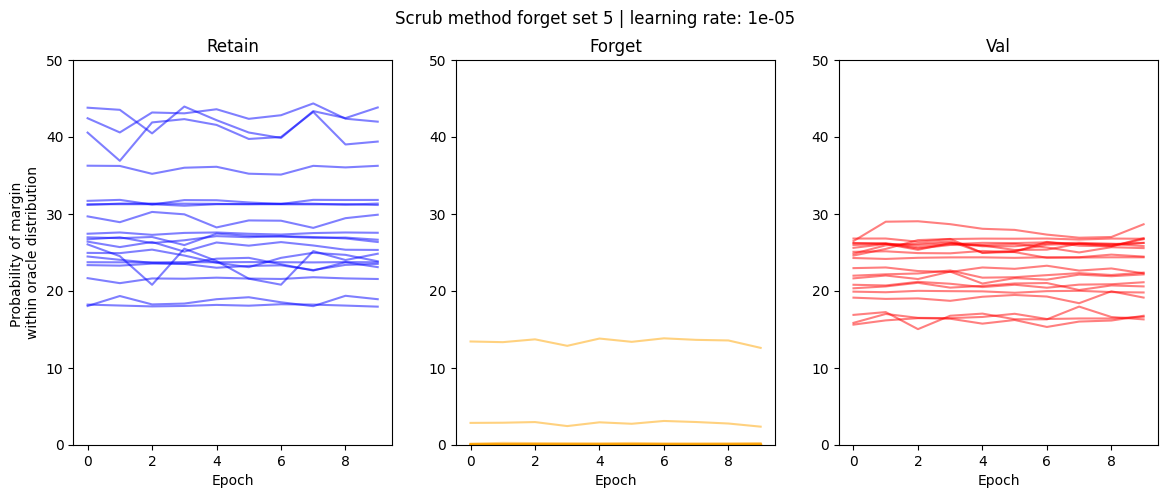

5e-05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__2c96ecb4075aa8193582d88b8b9979fc/direct
dirname - CIFAR10__5__scrub__2c96ecb4075aa8193582d88b8b9979fc


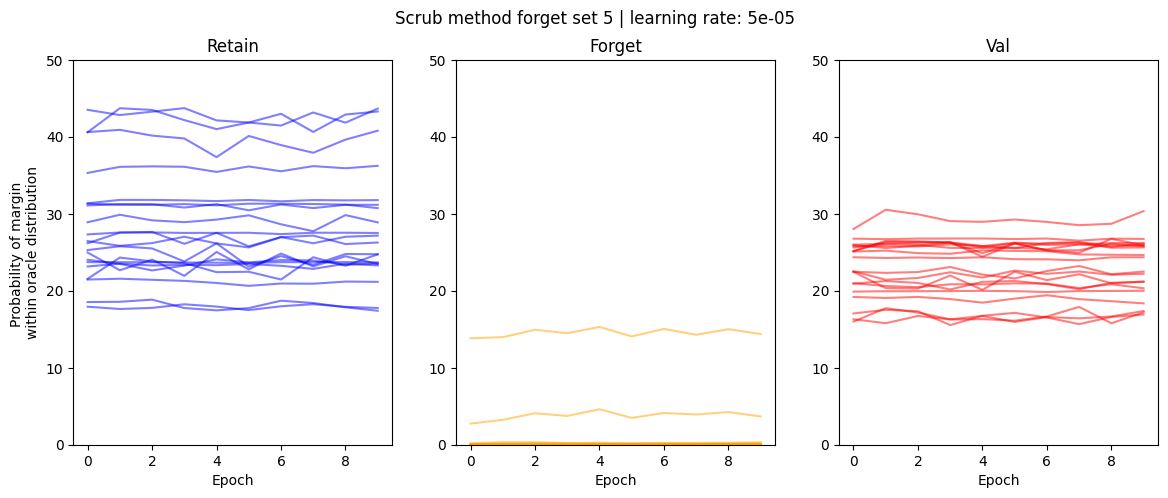

0.001
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__59c9b0a3c5ae88bace25058eba91a416/direct
dirname - CIFAR10__5__scrub__59c9b0a3c5ae88bace25058eba91a416


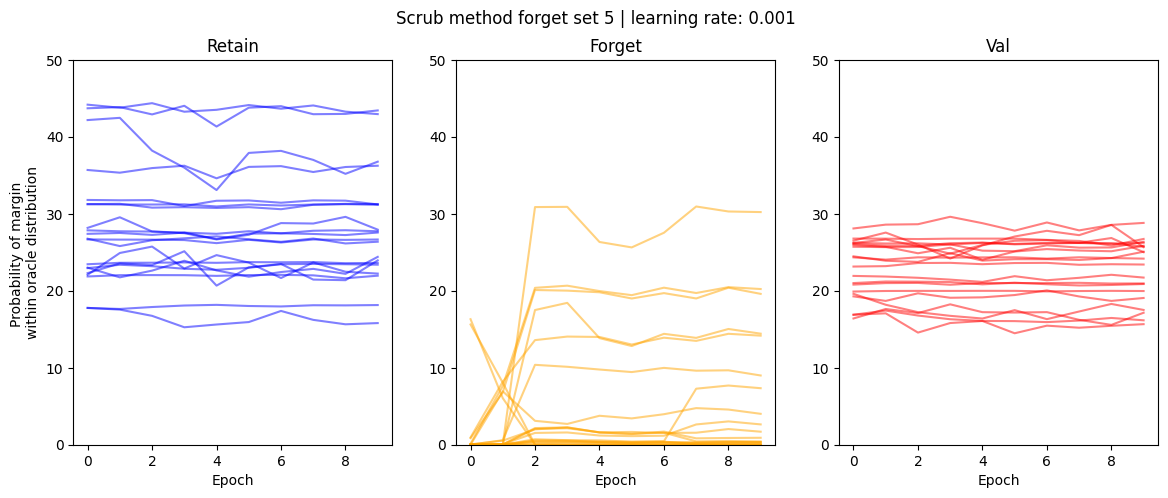

0.0001
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__ae822d0e357a6c0c22a43a17357ed336/direct
dirname - CIFAR10__5__scrub__ae822d0e357a6c0c22a43a17357ed336


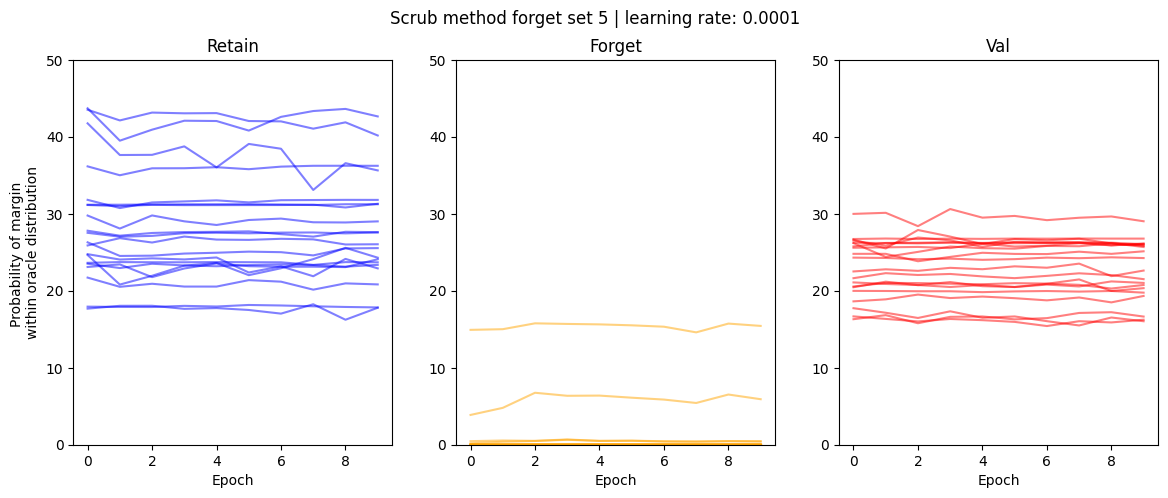

0.0005
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__2b6eddfc6f7ee66723980479c48a0de8/direct
dirname - CIFAR10__5__scrub__2b6eddfc6f7ee66723980479c48a0de8


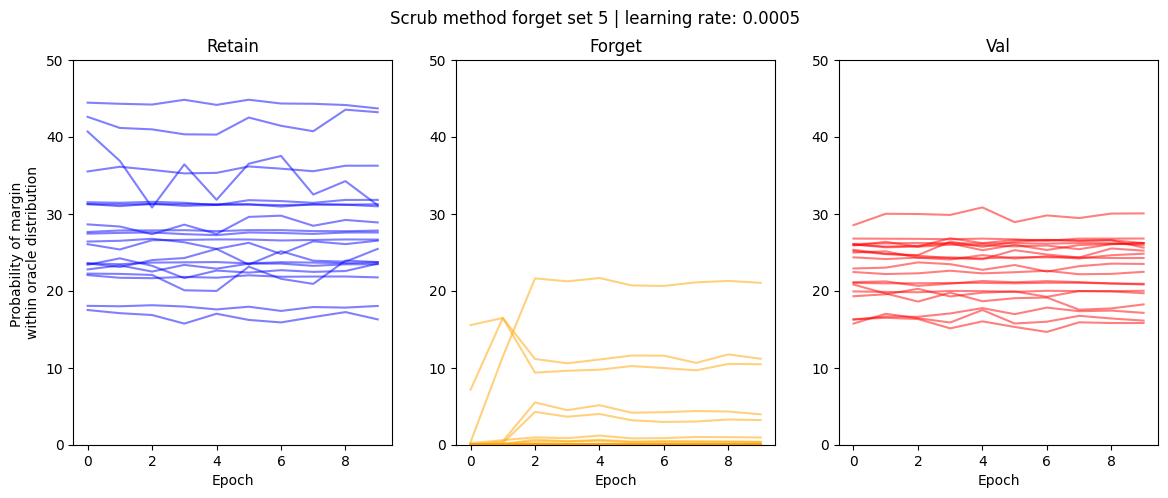

0.005
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__21590ac809f4884a9347c2e633b1a61d/direct
dirname - CIFAR10__5__scrub__21590ac809f4884a9347c2e633b1a61d


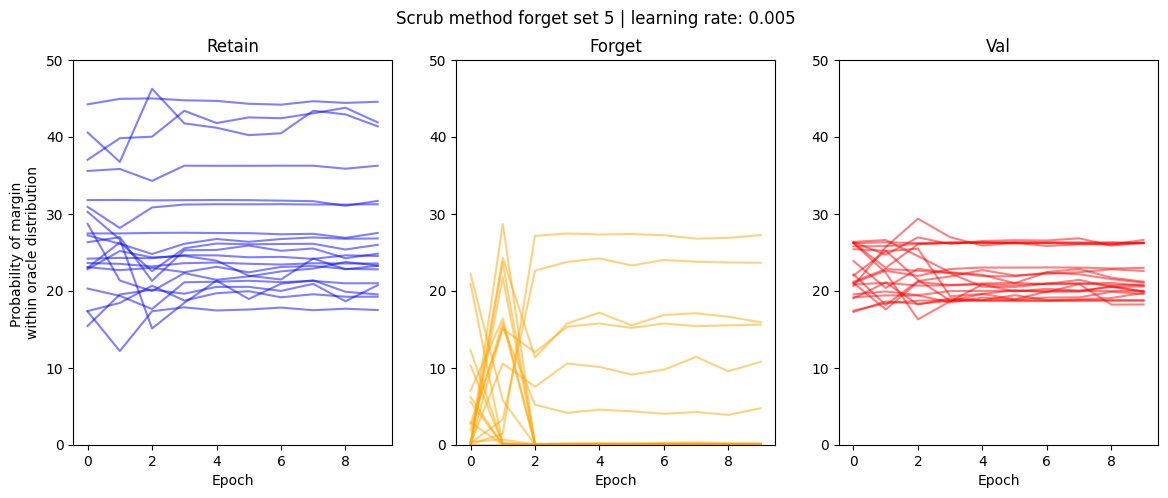

0.01
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__a361fd4e1780f10b784bb4c5886ccb3e/direct
dirname - CIFAR10__5__scrub__a361fd4e1780f10b784bb4c5886ccb3e


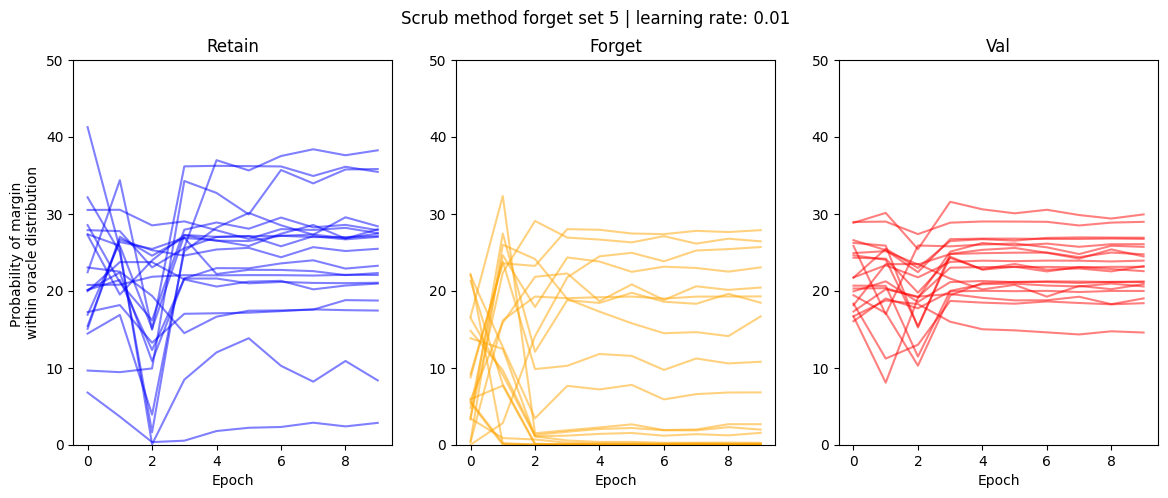

0.05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__33097e48ea70ff0acf681689a7c7af4f/direct
dirname - CIFAR10__5__scrub__33097e48ea70ff0acf681689a7c7af4f


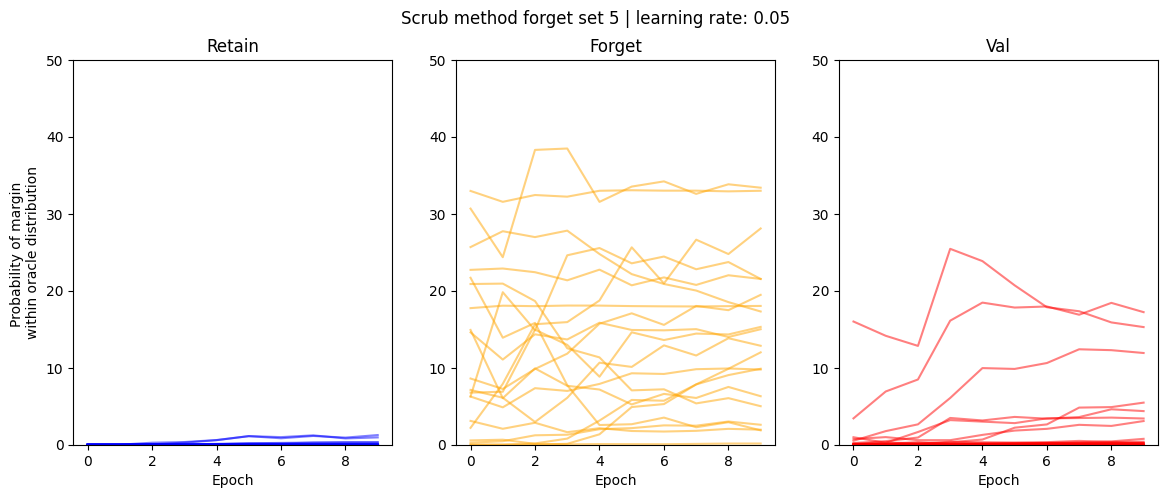

CIFAR10__5__dm_matching__927646aedc5246cc63704b84f1266307
0.0001
CIFAR10__5__dm_matching__8623e67b2fe977dbd5f8e4c216254a5f
0.0005
CIFAR10__5__dm_matching__52e0504b810b657f0a8be715550b4ea4
5e-05
CIFAR10__5__dm_matching__d109ea33f6e15a50dd0f35392d3c24f7
0.05
CIFAR10__5__dm_matching__e4d146b433b4d8db92fc0bccf757679b
1e-05
CIFAR10__5__dm_matching__996d70092a8ea4448f9fb3551251e391
0.01
CIFAR10__5__dm_matching__27dc5713713470ae5b8ac3b55482950e
0.005
CIFAR10__5__dm_matching__7d7eb1586c6e9dfc124486ce4db40ba8
0.001
0.0001
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__927646aedc5246cc63704b84f1266307/direct
dirname - CIFAR10__5__dm_matching__927646aedc5246cc63704b84f1266307


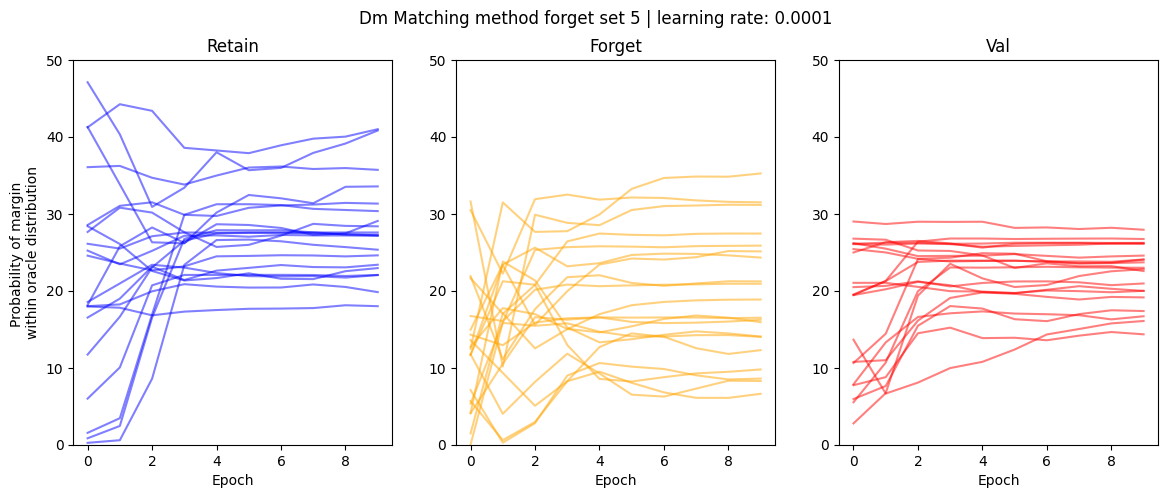

0.0005
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__8623e67b2fe977dbd5f8e4c216254a5f/direct
dirname - CIFAR10__5__dm_matching__8623e67b2fe977dbd5f8e4c216254a5f


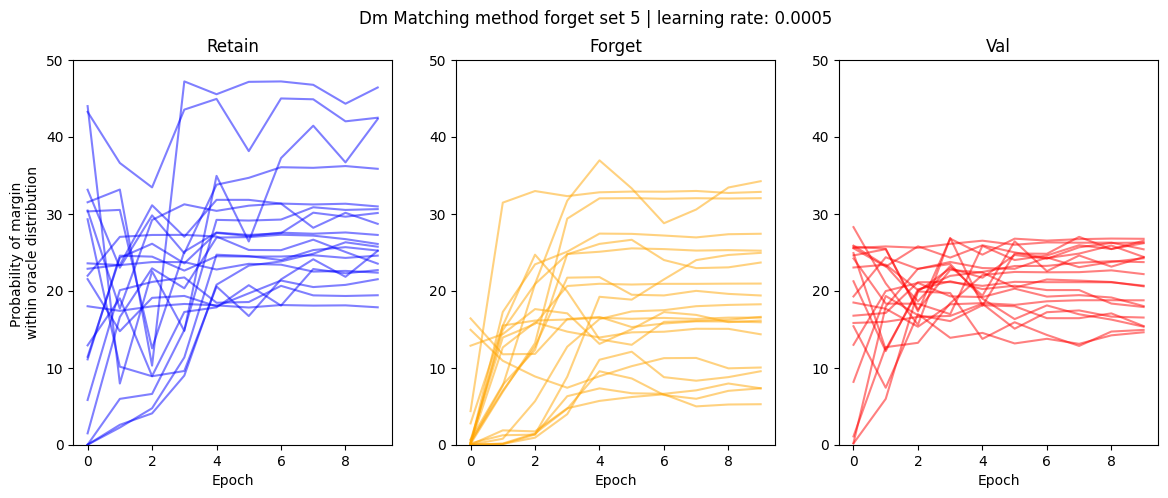

5e-05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__52e0504b810b657f0a8be715550b4ea4/direct
dirname - CIFAR10__5__dm_matching__52e0504b810b657f0a8be715550b4ea4


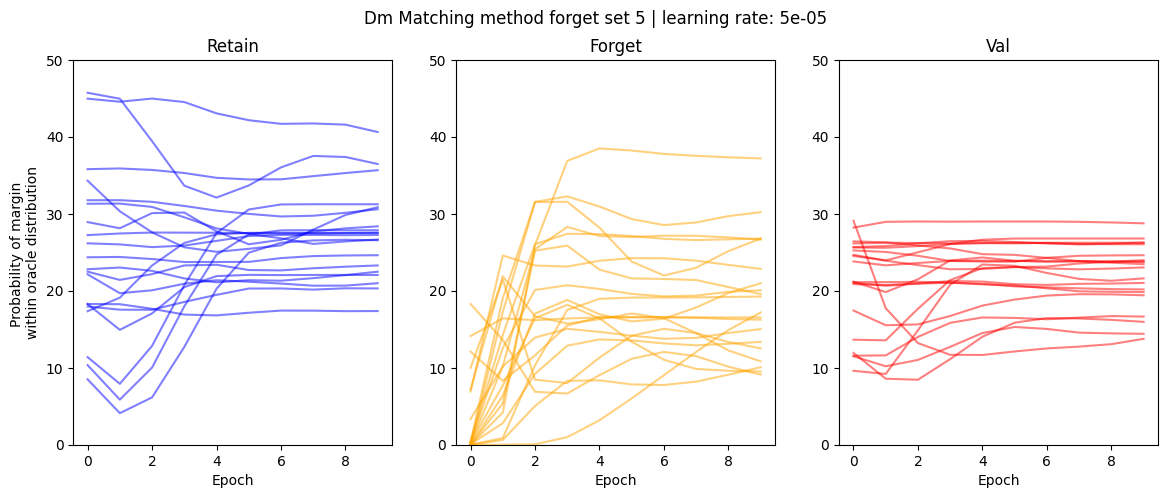

0.05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__d109ea33f6e15a50dd0f35392d3c24f7/direct
dirname - CIFAR10__5__dm_matching__d109ea33f6e15a50dd0f35392d3c24f7


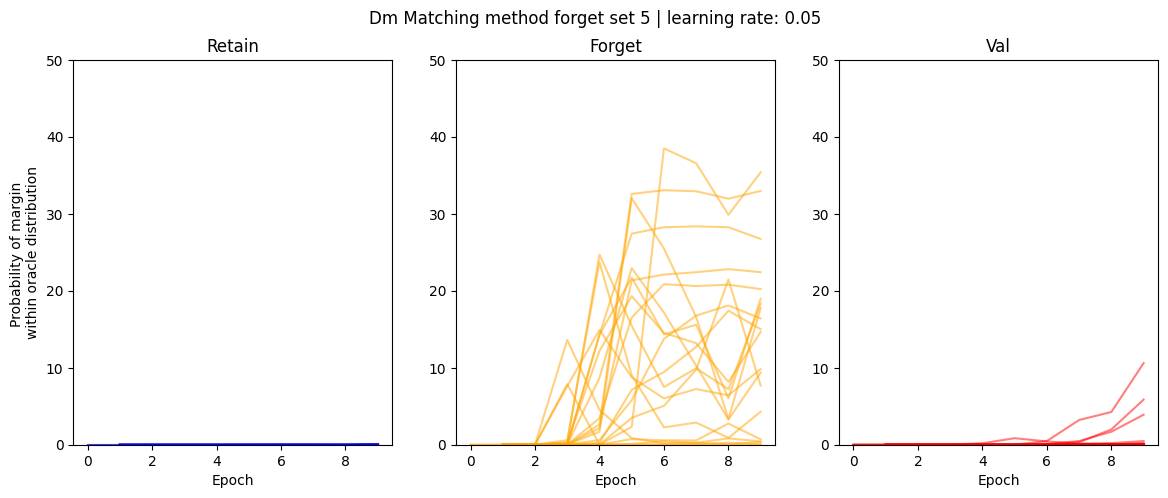

1e-05
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__e4d146b433b4d8db92fc0bccf757679b/direct
dirname - CIFAR10__5__dm_matching__e4d146b433b4d8db92fc0bccf757679b


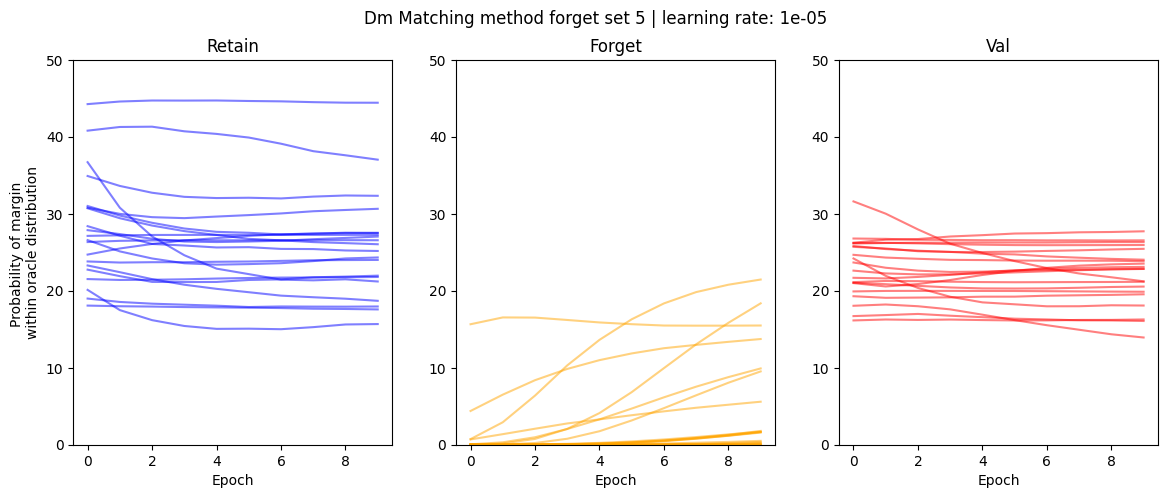

0.01
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__996d70092a8ea4448f9fb3551251e391/direct
dirname - CIFAR10__5__dm_matching__996d70092a8ea4448f9fb3551251e391


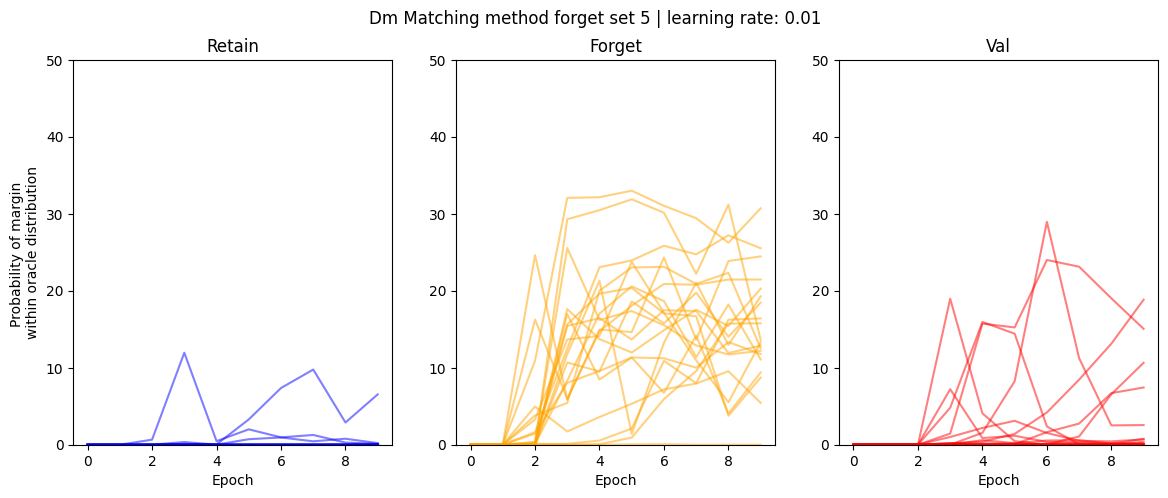

0.005
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__27dc5713713470ae5b8ac3b55482950e/direct
dirname - CIFAR10__5__dm_matching__27dc5713713470ae5b8ac3b55482950e


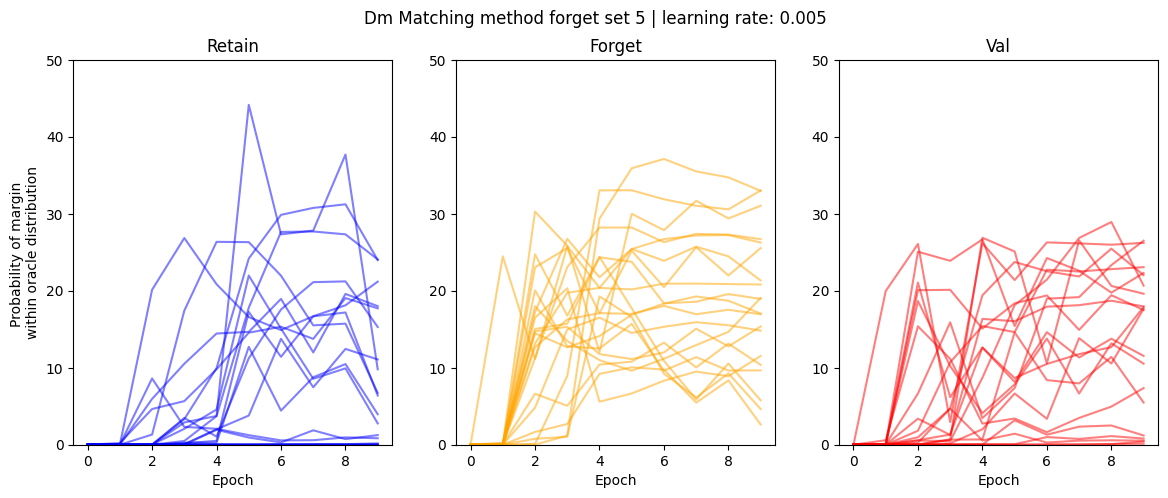

0.001
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__7d7eb1586c6e9dfc124486ce4db40ba8/direct
dirname - CIFAR10__5__dm_matching__7d7eb1586c6e9dfc124486ce4db40ba8


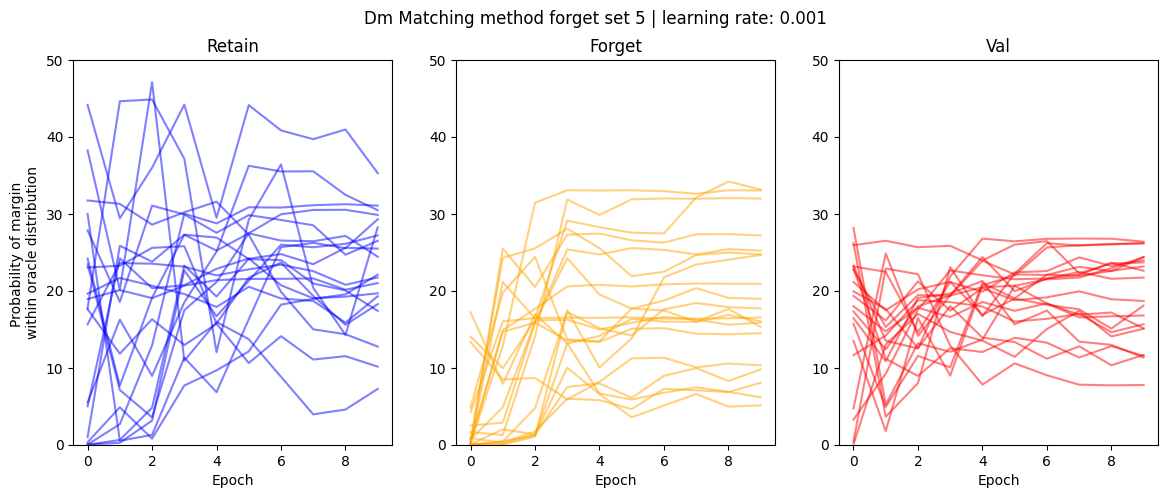

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def sort_key(x):
    return int(x.stem.split("__")[1])

methods = ["oracle_matching", "scrub", "dm_matching"]
#method = "scrub"
for method in methods:
    plot_dir = Path("/n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots")
    dirs = list(base_dir.glob(f"{ds_name}__{forget_set_id}__{method}*"))
    # only consider dir if it has a config.yaml file

    dirs = [dir_ for dir_ in dirs if (dir_ / "direct").exists()]
    for dir_ in dirs:
        print(dir_.name)
        config = load_yaml_skip_kv_errors(dir_ / "config.yaml")
        lr = config["unlearning_algo_kwargs"]["learning_rate"]
        print(lr)


    for dir_index, dir_ in enumerate(dirs):
        #dir_index = 0
        #dir_ = dirs[dir_index]
        config = load_yaml_skip_kv_errors(dir_ / "config.yaml")
        lr = config["unlearning_algo_kwargs"]["learning_rate"]
        print(lr)
        direct_dir = dirs[dir_index] /"direct"
        print(direct_dir)

        nps = sorted(list(direct_dir.glob("0_*.npy")), key=sort_key )
        if len(nps) == 0:
            print(f"Skipping {direct_dir}. because empty")
            continue
        all_nps = {
            i : sorted(list(direct_dir.glob(f"{i}_*.npy")), key=sort_key ) for i in range(10)
        }

        window= 1
        timesteps = 10

        # check that all _nps have the same length
        skip = False
        for i, nps in all_nps.items():
            if len(nps) != timesteps:
                skip = True
        if skip:
            print(f"Skipping {direct_dir}. because not all timesteps are present")
            continue

        fig , axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
        def generate_plots(ax, pts, indices, color):
            
            for index in indices:
                ind = pts[index]
                probs = []
                for timestep in range(timesteps):
                    probs.append(compute_prob(ind, timestep))
                ax.plot(probs, label="retain", c= color , alpha = .5)
            return probs 
        generate_plots(axs[0], retain_points, range(20), "blue")
        generate_plots(axs[1], forget_set_indices, range(20), "orange")
        generate_plots(axs[2], val_pts, range(20), "red")

        axs[0].set_title("Retain")
        axs[1].set_title("Forget")
        axs[2].set_title("Val")
        # x axis is epochs
        for ax in axs:
            ax.set_xlabel("Epoch")
            ax.set_ylim(0, 50)

        # legend only ahve the first two
        #plt.legend(labels)
        #labels = ["retain", "forget"]
        method = method.replace("_", " ")
        # capitalize first letter of spaces
        method = " ".join([word.capitalize() for word in method.split(" ")])
        plt.suptitle(f"{method} method forget set {forget_set_id} | learning rate: {lr} ")
        #plt.legend()
        axs[0].set_ylabel("Probability of margin \nwithin oracle distribution")
        # save pdf to dir_
        dirname = dir_.name
        print(f"dirname - {dirname}")
        plt.savefig(dir_.parent / f"margins_over_time__{dirname}__{datestr}.pdf")
        plt.savefig(plot_dir / f"margins_over_time__{dirname}__{datestr}.pdf")
        
        plt.show()




In [ ]:
0.005

#dirname - CIFAR10__5__scrub__21590ac809f4884a9347c2e633b1a61d

#0.01


0.0001
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__36b1132f9e0317a78c85cb0ba424ffc6/direct
forget
retain
val
done
dirname - CIFAR10__5__oracle_matching__36b1132f9e0317a78c85cb0ba424ffc6


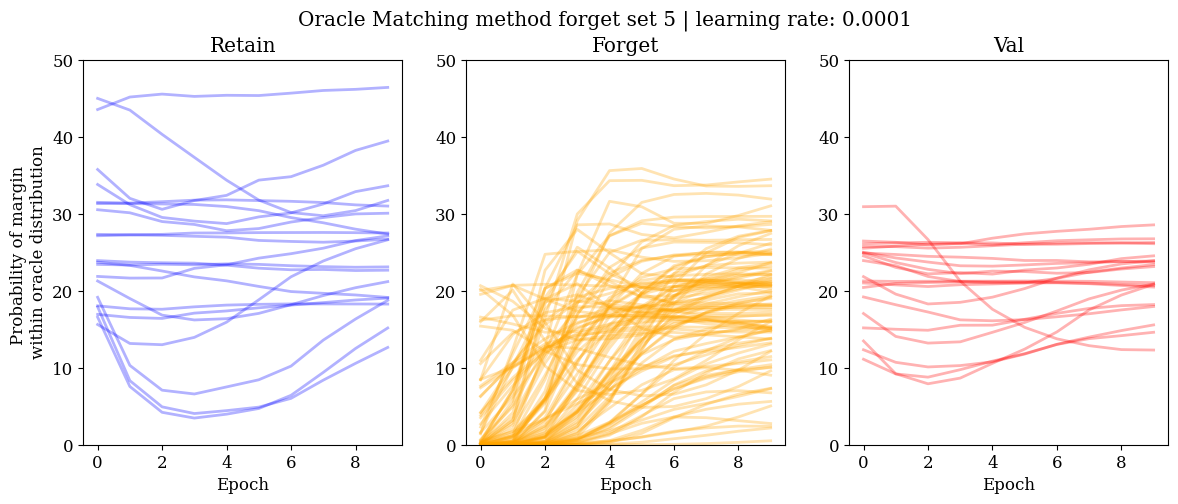

[[38, 50, 55], [31, 96, 99], [24, 35, 83], [3, 19, 25, 46, 57, 72, 84, 88], [4, 65, 80, 91], [21, 22, 42, 53, 95], [1, 7, 11, 33, 41, 45, 69, 73, 86, 93], [0, 9, 26, 47, 64, 70, 71, 76, 85, 94], [2, 6, 8, 14, 23, 27, 29, 48, 54, 67], [5, 10, 12, 13, 15, 16, 17, 18, 20, 28]]
fn - /n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots/peaks__5__Oracle_Matching__2024-07-10_13-49-09.pdf
fn - /n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots/peaks__5__Oracle_Matching__2024-07-10_13-49-09.png


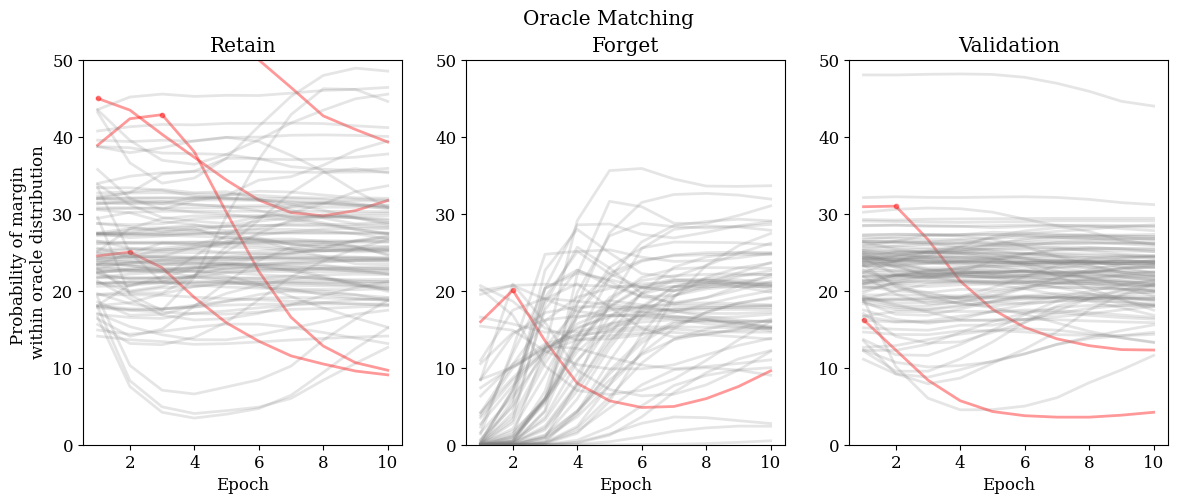

0.01
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__a361fd4e1780f10b784bb4c5886ccb3e/direct
forget
retain
val
done
dirname - CIFAR10__5__scrub__a361fd4e1780f10b784bb4c5886ccb3e


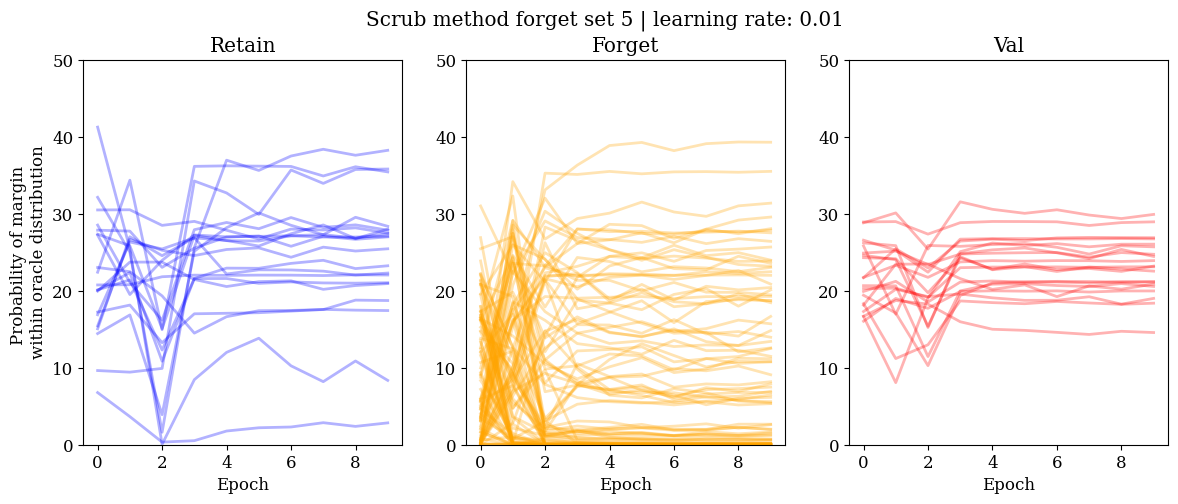

[[0, 1, 3, 4, 7, 9, 11, 14, 16, 21], [5, 6, 8, 12, 17, 19, 20, 23, 26, 32], [18, 34, 36, 45, 52, 67, 68, 77, 79, 85], [2, 13, 46, 82], [], [], [28, 71], [], [43, 61, 86, 97], [10, 15, 70]]
fn - /n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots/peaks__5__Scrub__2024-07-10_13-49-09.pdf
fn - /n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots/peaks__5__Scrub__2024-07-10_13-49-09.png


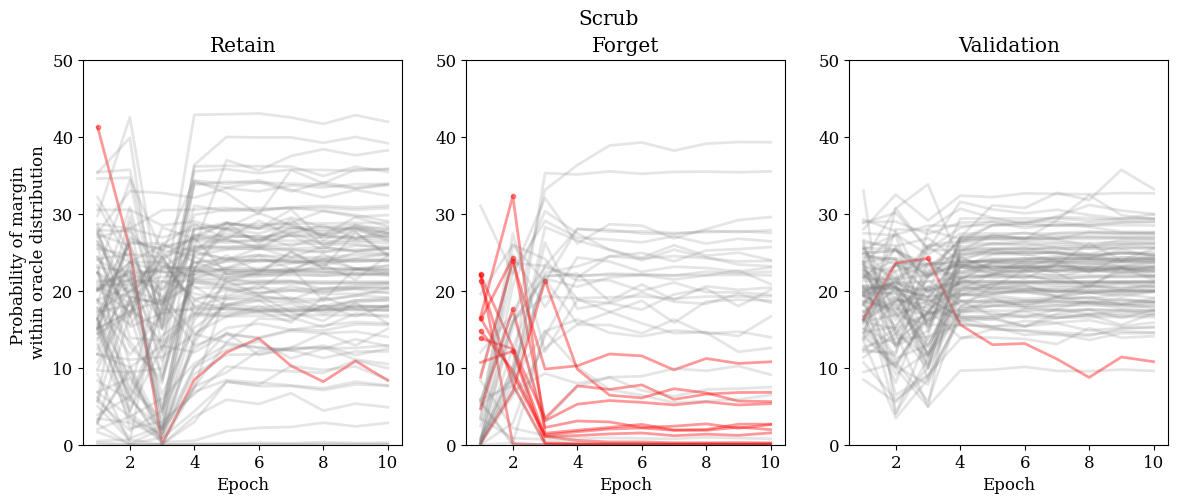

0.0001
/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__927646aedc5246cc63704b84f1266307/direct
forget
retain
val
done
dirname - CIFAR10__5__dm_matching__927646aedc5246cc63704b84f1266307


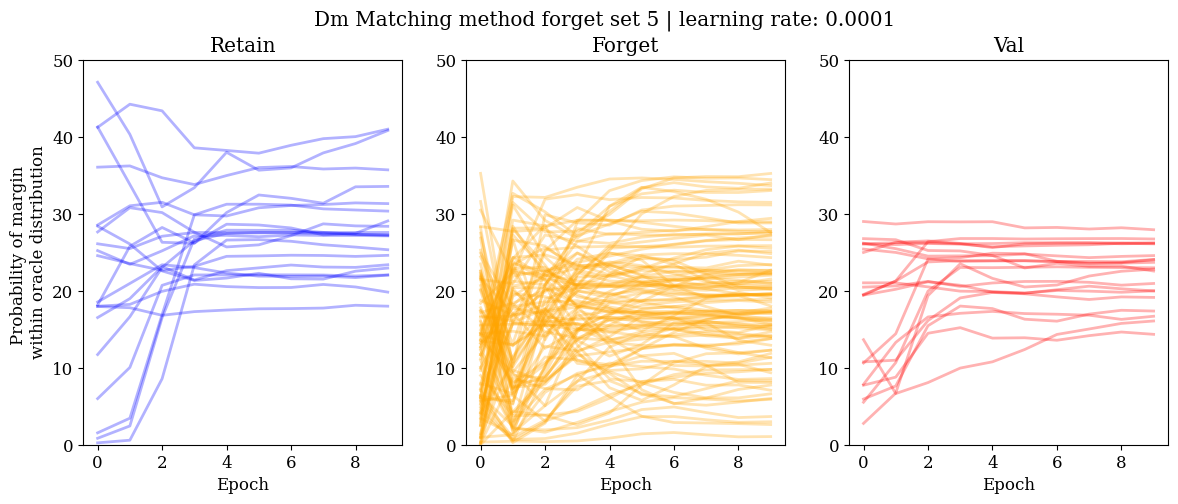

[[4, 21, 24, 26, 30, 37, 42, 44, 48, 51], [0, 1, 16, 17, 34, 36, 40, 49, 56, 62], [2, 11, 22, 43, 50, 59, 64, 68, 72, 73], [9, 19, 23, 29, 31, 32, 46, 55, 75, 81], [3, 6, 7, 8, 18, 41, 47, 71, 80, 83], [5, 27, 45, 74, 77, 93], [20, 33, 38, 60, 61, 65, 79], [], [13, 14, 25, 28, 35, 39, 84, 88], [10, 12, 15, 54, 57, 63, 85, 89]]
fn - /n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots/peaks__5__Dm_Matching__2024-07-10_13-49-09.pdf
fn - /n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots/peaks__5__Dm_Matching__2024-07-10_13-49-09.png


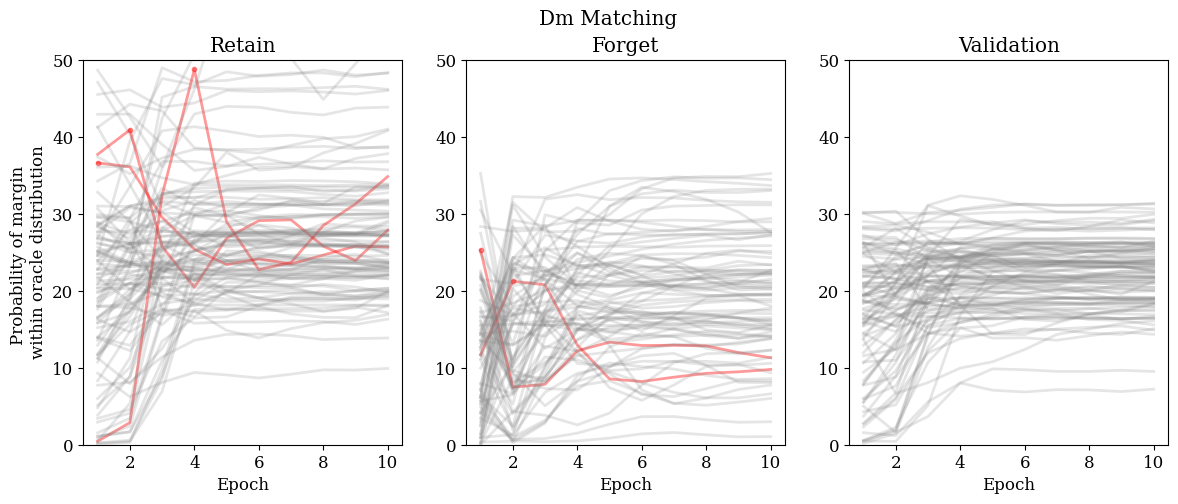

In [120]:
method = "scrub"
scrub_dirs= [Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__a361fd4e1780f10b784bb4c5886ccb3e"),
       Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__21590ac809f4884a9347c2e633b1a61d/")
       ]

# dm dirs 
method = "DM Matching"
dm_dirs  = [Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__927646aedc5246cc63704b84f1266307")]

method = "Oracle Matching"
om_dirs = [Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__36b1132f9e0317a78c85cb0ba424ffc6"), Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__8619f2f65aca013b1b69c250f249517e")]
dirs = om_dirs

dirs, method = dm_dirs,"Data Model Matching"
dirs, method = om_dirs,"Oracle Matching"
dirs, method = scrub_dirs,"SCRUB"
methods_to_dirs = {
    "oracle_matching": om_dirs,
    "scrub": scrub_dirs,
    "dm_matching": dm_dirs

}
save = True 
for method, dirs in methods_to_dirs.items():
    for dir_index, dir_ in enumerate(dirs):
        #dir_index = 0
        #dir_ = dirs[dir_index]
        config = load_yaml_skip_kv_errors(dir_ / "config.yaml")
        lr = config["unlearning_algo_kwargs"]["learning_rate"]
        print(lr)
        direct_dir = dirs[dir_index] /"direct"
        print(direct_dir)

        nps = sorted(list(direct_dir.glob("0_*.npy")), key=sort_key )
        if len(nps) == 0:
            print(f"Skipping {direct_dir}. because empty")
            continue
        all_nps = {
            i : sorted(list(direct_dir.glob(f"{i}_*.npy")), key=sort_key ) for i in range(10)
        }

        window= 1
        timesteps = 10

        # check that all _nps have the same length
        skip = False
        for i, nps in all_nps.items():
            if len(nps) != timesteps:
                skip = True
        if skip:
            print(f"Skipping {direct_dir}. because not all timesteps are present")
            continue

        fig , axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

        def get_all_probs(pts, indices):
            all_probs = []
            for index in indices:
                ind = pts[index]
                probs = []
                for timestep in range(timesteps):
                    probs.append(compute_prob(ind, timestep))
                all_probs.append(probs)
            return all_probs
        print(f"forget")
        forget_probs = get_all_probs(forget_set_indices, range(len(forget_set_indices)))
        print(f"retain")
        retain_probs = get_all_probs(retain_points, range(300))
        print("val")
        val_probs = get_all_probs(val_pts, range(300))
        print("done")
        def generate_plots(ax, pts, indices, color):
            
            for index in indices:
                ind = pts[index]
                probs = []
                for timestep in range(timesteps):
                    probs.append(compute_prob(ind, timestep))
                ax.plot(probs, label="retain", c= color , alpha = .3)
            return probs 
        
        generate_plots(axs[0], retain_points, range(20), "blue")
        generate_plots(axs[1], forget_set_indices, range(100), "orange")
        # goal - find points that go up and then down
        generate_plots(axs[2], val_pts, range(20), "red")


        axs[0].set_title("Retain")
        axs[1].set_title("Forget")
        axs[2].set_title("Val")
        # x axis is epochs
        for ax in axs:
            ax.set_xlabel("Epoch")
            ax.set_ylim(0, 50)

        # legend only ahve the first two
        #plt.legend(labels)
        #labels = ["retain", "forget"]
        method = method.replace("_", " ")
        # capitalize first letter of spaces
        method = " ".join([word.capitalize() for word in method.split(" ")])
        plt.suptitle(f"{method} method forget set {forget_set_id} | learning rate: {lr} ")
        #plt.legend()
        axs[0].set_ylabel("Probability of margin \nwithin oracle distribution")
        # save pdf to dir_
        dirname = dir_.name
        print(f"dirname - {dirname}")
        if save:
            plt.savefig(dir_.parent / f"margins_over_time__{dirname}__{datestr}.pdf")
            plt.savefig(plot_dir / f"margins_over_time__{dirname}__{datestr}.pdf")
        
        plt.show()
        break 


    # plot forget_probs
    # find points that peak at index i
    # 
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(14, 5))

    def find_peaks(forget_probs, i):
        peaks = []
        for ind, forget_prob in enumerate(forget_probs):
            # check if it peaks at index i
            if max(forget_prob) == forget_prob[i]:
                peaks.append(ind)
        return peaks
    forget_peaks = [find_peaks(forget_probs, i) for i in range(10)]
    val_peaks = [find_peaks(val_probs, i) for i in range(10)]
    retain_peaks = [find_peaks(retain_probs, i) for i in range(10)]


    #peak_counts = [len(peaks[i]) for i in range(10)]
    #print(peak_counts)
    # 

    # pick the first 5 indices from each peak
    num_per_peak = 10

    forget_indices_of_interest = [peak[:num_per_peak] for peak in forget_peaks]
    val_indices_of_interest = [peak[:num_per_peak] for peak in val_peaks]
    retain_indices_of_interest = [peak[:num_per_peak] for peak in retain_peaks]
    print(forget_indices_of_interest)
    # flatten list of lists to a list 
    #indices_of_interest = [ind for peak in indices_of_interest for ind in peak]
    #indices_of_interest
    colors = {1: "blue", 2: "orange", 3: "green", 4: "red", 5: "purple", 6: "brown", 7: "pink", 8: "gray", 9: "olive", 10: "cyan"}
    # color range from 1 to 10
    colors = {i: colors[i] for i in range(1, 11)}
    # plot indicies of interest

    alpha = .3 

    def filter_(probs):
        # check if after the max, the value goes down by more than 10% of range
        min_max_range = max(probs) - min(probs)
        max_prob = max(probs)
        max_index = probs.index(max_prob)
        remaining_min = min(probs[max_index:])
        last_pt = probs[-1]

        if min_max_range > 10 and abs(max_prob - remaining_min) > 10 and abs(max_prob - last_pt) > 10:
            return True
        return False

    for name, ax, indices_of_interest, set_probs in [("Forget", axs[1], forget_indices_of_interest, forget_probs), ("Validation", axs[2], val_indices_of_interest, val_probs), ("Retain", axs[0], retain_indices_of_interest, retain_probs)]:
        for color_ind, indices in enumerate(indices_of_interest):
            color = colors[color_ind + 1]

            for ind in indices:
                #probs = []
                #for timestep in range(timesteps):
                #    probs.append(compute_prob(ind, timestep))
                probs = set_probs[ind]

                #put a dot at the peak
                max_prob = max(probs)
                max_index = probs.index(max_prob)
                min_max_range = max(probs) - min(probs)
                #if min_max_range > 10:
                color = "gray"
                alpha = .2
                if filter_(probs):
                    color = "red"
                    alpha = .4
                    ax.scatter(max_index+1, max_prob, c=color, s = 10, alpha = alpha)
                # plot the line
                ax.plot(np.arange(1,timesteps+1) , probs, c= color , alpha = alpha)

            ax.set_title(name)
    plt.suptitle(f"{method}")
    # save to plot_dir
    # remove spaces from method
    axs[0].set_ylabel("Probability of margin \nwithin oracle distribution")
    for ax in axs:
        ax.set_xlabel("Epoch")
        ax.set_ylim(0, 50)
    # 
    fn = plot_dir / f"peaks__{forget_set_id}__{method.replace(' ', '_')}__{datestr}.pdf"
    print(f"fn - {fn}")
    plt.savefig(fn)
    fn = plot_dir / f"peaks__{forget_set_id}__{method.replace(' ', '_')}__{datestr}.png"
    print(f"fn - {fn}")
    plt.savefig(fn)

    plt.show()

method - oracle_matching
0.0001
forget
method - scrub
0.01
forget
method - dm_matching
0.0001
forget
forget_probs[0]-  [0.014382100452208583, 0.4486993539289692, 3.224521465089304, 9.21696966331365, 15.49804077640465, 19.68958767900998, 21.29076873277283, 21.42946243739578, 21.025540414208677, 20.666205721796953]
forget_probs[0]-  [14.786831546430165, 9.681784848648658, 1.2736604617178977, 1.6866635245206656, 2.0420648959383856, 2.173151008775092, 1.8793261420453282, 1.86397544273283, 2.2785000077559743, 1.9632765288629808]
forget_probs[0]-  [11.66677241485486, 21.229620464598963, 20.77383130353034, 12.95428738791168, 8.546926762979751, 8.20624255091002, 8.773486683301153, 9.267111155299181, 9.469625875194849, 9.774284690927459]
fn - /n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots/peaks_forget_set__5__dm_matching__2024-07-10_13-49-09.pdf
fn - /n/home04/rrinberg/code/unlearning-with-trak/unlearning/auditors/margin_plots/peaks_forget_set__5__dm_matching__202

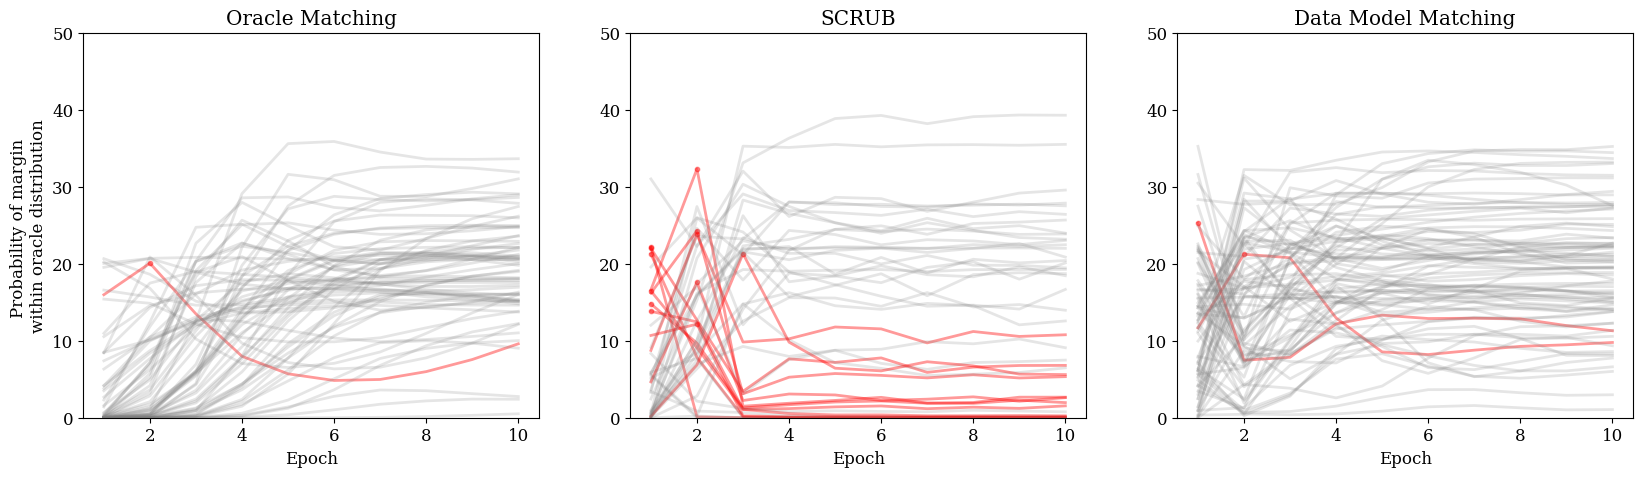

In [119]:

method = "scrub"
scrub_dirs= [Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__a361fd4e1780f10b784bb4c5886ccb3e"),
       Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__scrub__21590ac809f4884a9347c2e633b1a61d/")
       ]

# dm dirs 
method = "DM Matching"
dm_dirs  = [Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__dm_matching__927646aedc5246cc63704b84f1266307")]

method = "Oracle Matching"
om_dirs = [Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__36b1132f9e0317a78c85cb0ba424ffc6"), Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__5__oracle_matching__8619f2f65aca013b1b69c250f249517e")]
dirs = om_dirs

dirs, method = dm_dirs,"Data Model Matching"
#dirs, method = om_dirs,"Oracle Matching"
#dirs, method = scrub_dirs,"SCRUB"

methods_to_dirs = {
    "oracle_matching": om_dirs,
    "scrub": scrub_dirs,
    "dm_matching": dm_dirs
}

save = False 
method_to_forget_probs = {}

for method, dirs in methods_to_dirs.items():
    print(f"method - {method}")
    for dir_index, dir_ in enumerate(dirs):
        #dir_index = 0
        #dir_ = dirs[dir_index]
        config = load_yaml_skip_kv_errors(dir_ / "config.yaml")
        lr = config["unlearning_algo_kwargs"]["learning_rate"]
        print(lr)
        direct_dir = dirs[dir_index] /"direct"
        nps = sorted(list(direct_dir.glob("0_*.npy")), key=sort_key )
        if len(nps) == 0:
            print(f"Skipping {direct_dir}. because empty")
            continue
        all_nps = {
            i : sorted(list(direct_dir.glob(f"{i}_*.npy")), key=sort_key ) for i in range(10)
        }

        window= 1
        timesteps = 10
        # check that all _nps have the same length
        skip = False
        for i, nps in all_nps.items():
            if len(nps) != timesteps:
                skip = True
        if skip:
            print(f"Skipping {direct_dir}. because not all timesteps are present")
            continue

        def get_all_probs(pts, indices):
            all_probs = []
            for index in indices:
                ind = pts[index]
                probs = []
                for timestep in range(timesteps):
                    probs.append(compute_prob(ind, timestep))
                all_probs.append(probs)
            return all_probs
        print(f"forget")
        method_to_forget_probs[method] = get_all_probs(forget_set_indices, range(len(forget_set_indices)))

        break 



# plot forget_probs
# find points that peak at index i
# 
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))


def find_peaks(forget_probs, i):
    peaks = []
    for ind, forget_prob in enumerate(forget_probs):
        # check if it peaks at index i
        if max(forget_prob) == forget_prob[i]:
            peaks.append(ind)
    return peaks

method_name_fixer = {
    "oracle_matching": "Oracle Matching",
    "scrub": "SCRUB",
    "dm_matching": "Data Model Matching"
}
for method_i, (method, forget_probs) in enumerate( method_to_forget_probs.items()):
    print(f"forget_probs[0]-  {forget_probs[0]}")
    forget_peaks = [find_peaks(forget_probs, i) for i in range(10)]

    num_per_peak = 10

    forget_indices_of_interest = [peak[:num_per_peak] for peak in forget_peaks]

    alpha = .3 

    def filter_(probs):
        # check if after the max, the value goes down by more than 10% of range
        min_max_range = max(probs) - min(probs)
        max_prob = max(probs)
        max_index = probs.index(max_prob)
        remaining_min = min(probs[max_index:])
        last_pt = probs[-1]

        if min_max_range > 10 and abs(max_prob - remaining_min) > 10 and abs(max_prob - last_pt) > 10:
            return True
        return False

    def filter2_(probs):
        # check if after the max, the value goes down by more than 10% of range
        min_max_range = max(probs) - min(probs)
        max_prob = max(probs)
        max_index = probs.index(max_prob)
        remaining_min = min(probs[max_index:])
        last_pt = probs[-1]

        if min_max_range > 10 and abs(max_prob - remaining_min) > 10:
            return True
        return False
    
    ax = axs[method_i]

    for color_ind, indices in enumerate(forget_indices_of_interest):
        color = colors[color_ind + 1]

        for ind in indices:
            probs = forget_probs[ind]

            #put a dot at the peak
            max_prob = max(probs)
            max_index = probs.index(max_prob)
            min_max_range = max(probs) - min(probs)
            #if min_max_range > 10:
            color = "gray"
            alpha = .2

            if False: # filter2_(probs):
                color = "pink"
                alpha = .6
                ax.scatter(max_index+1, max_prob, c=color, s = 10, alpha = alpha)
            if filter_(probs):
                color = "red"
                alpha = .4
                ax.scatter(max_index+1, max_prob, c=color, s = 10, alpha = alpha)

            # plot the line
            ax.plot(np.arange(1,timesteps+1) , probs, c= color , alpha = alpha)

            ax.set_title(method_name_fixer[method])
            
#plt.suptitle(f"Forget Set {forget_set_id}")
# save to plot_dir
# remove spaces from method
axs[0].set_ylabel("Probability of margin \nwithin oracle distribution")
for ax in axs:
    ax.set_xlabel("Epoch")
    ax.set_ylim(0, 50)
# 
if True:
    fn = plot_dir / f"peaks_forget_set__{forget_set_id}__{method.replace(' ', '_')}__{datestr}.pdf"
    print(f"fn - {fn}")
    plt.savefig(fn)
    fn = plot_dir / f"peaks_forget_set__{forget_set_id}__{method.replace(' ', '_')}__{datestr}.png"
    print(f"fn - {fn}")
    plt.savefig(fn)

plt.show()

dict_keys(['oracle_matching', 'scrub', 'dm_matching'])

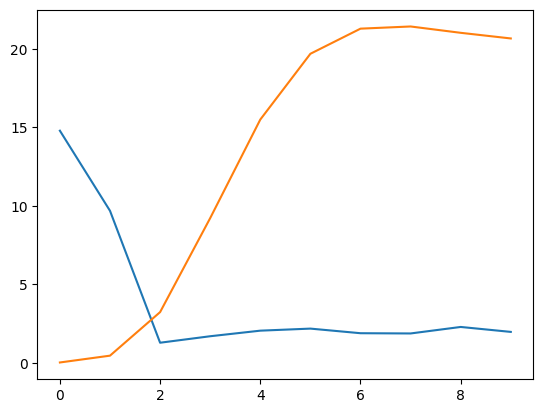

In [99]:
len(method_to_forget_probs["oracle_matching"][0])
len(method_to_forget_probs["scrub"][0])
plt.plot(method_to_forget_probs["scrub"][0])
plt.plot(method_to_forget_probs["oracle_matching"][0])
method_to_forget_probs.keys()

In [36]:
len(forget_probs)

100

In [ ]:
for i, forget_prob in enumerate(forget_probs):
    plt.plot(forget_prob, label=f"forget_{i}")
plt.show()

In [ ]:
#CIFAR10__5__scrub__21590ac809f4884a9347c2e633b1a61d


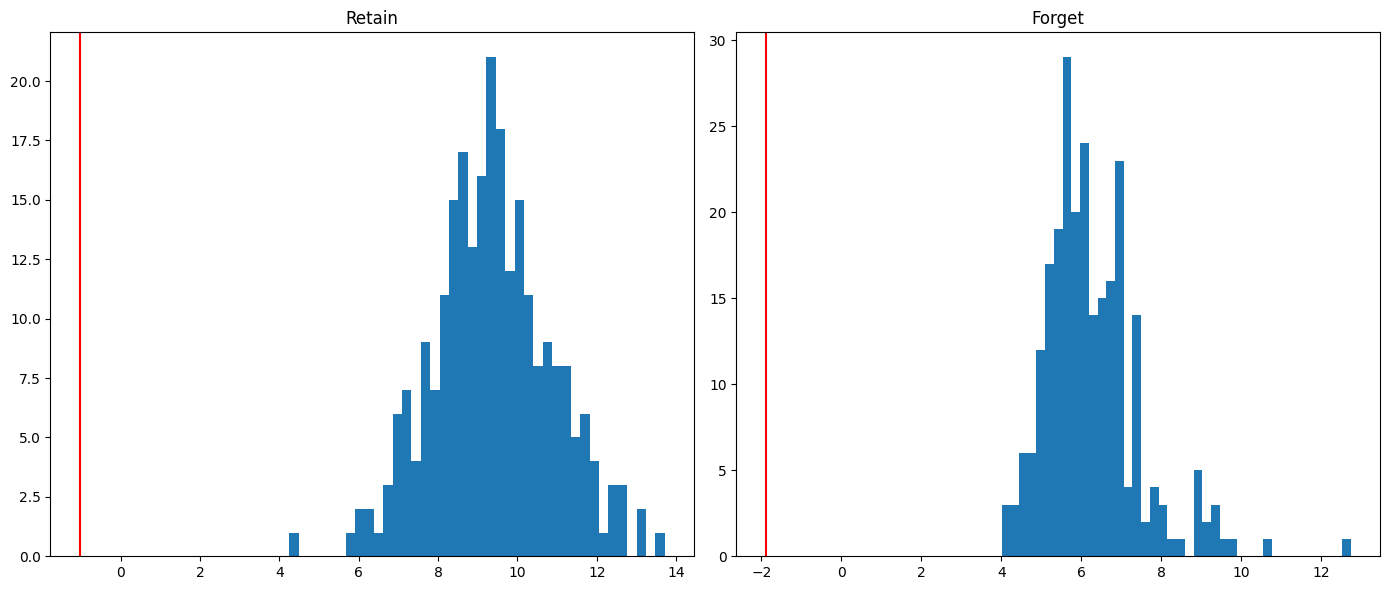

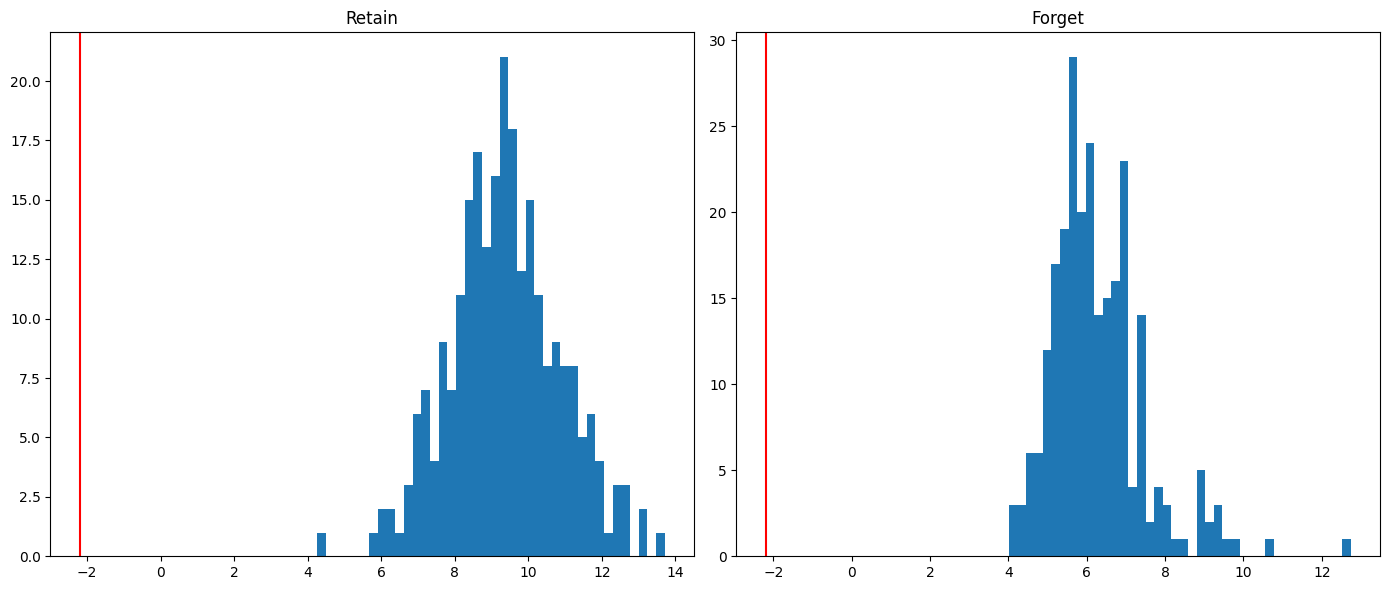

IndexError: list index out of range

In [105]:

i = 1
if True:
    for timestep in [0,2,4]:

        data = np.load(nps[timestep])

        retain_ind = retain_points[i]
        forget_ind = forget_set_indices[i]

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # First subplot: Retain
        axes[0].hist(all_oracle_margins[:, retain_ind].numpy(), bins=40)
        margin_retain = data[retain_ind]
        axes[0].set_title("Retain")
        axes[0].axvline(margin_retain, color="red")

        # Second subplot: Forget
        axes[1].hist(all_oracle_margins[:, forget_ind].numpy(), bins=40)
        margin_forget = data[forget_ind]
        axes[1].set_title("Forget")
        axes[1].axvline(margin_forget, color="red")

        # Show the plot
        plt.tight_layout()
        plt.show()
    print("----\n" * 4)


In [ ]:

dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__1__scrub__3ac40e807b13723b8c83b5ee12fbf71e/direct")

dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__3__scrub__11451778336841829e82dd095538da92/direct")
dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__3__scrub__57d0bd0c3dbec1c744b765a44c3202f8/direct")

dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__3__scrub__bc1318122964b21911e259a97f294794/direct")

dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__6__scrub__8585e23053035aa38852ad2ceeacfc35/direct")
#     "learning_rate": 2e-3,

dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__6__scrub__3e152cb09a3910c55c3341d9997d7ebd/direct")

dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__6__scrub__a45139eda8d1611319d6f5abc1084c2e/direct")

forget_set_id = 6
method = "scrub"

dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__6__oracle_matching__96b7f0ea66bbe3062bc3ad5ed9602bc4/direct")
dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__6__oracle_matching__5b2d5eec1d48ae6196f1f0bd2f498b9a/direct")
dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__6__oracle_matching__7c521fa611fd2673a498262380d8d095/direct")
method = "oracle_matching"

dir_ = Path("/n/home04/rrinberg/data_dir__scratch_sneel/unlearning/KLOM/margins_over_time/CIFAR10__6__scrub__ed389d6efb2fa3e1fe61ce5426933599/direct")
method = "SCRUB"